# 19 Sep 23 - The Duffing Oscillator

We have developed a set of tools to investigate differential equations. You will now apply those skills to the [Duffing Oscillator](https://en.wikipedia.org/wiki/Duffing_equation). The Duffing Oscillator is a second order differential equation that is used to model a forced nonlinear spring. The equation is given by:

$$\frac{d^2x}{dt^2} + \delta \frac{dx}{dt} + \alpha x + \beta x^3 = \gamma \cos(\omega t)$$

And written in the form $\ddot{x} = f(x, \dot{x}, t)$, it is:

$$\ddot{x} = - \delta \dot{x} - \alpha x - \beta x^3 + \gamma \cos(\omega t)$$

where $x$ is the position of the oscillator, $\delta$ is a damping term, $\alpha$ is the stiffness of the spring, $\beta$ is the strength of the non-linear term, $\gamma$ is the amplitude of the driving force, and $\omega$ is the frequency of the driving force.

![Duffing Oscillator](https://upload.wikimedia.org/wikipedia/commons/f/fc/Duffing_oscillator_strange_attractor_with_color.gif)

*From [Wikipedia](https://commons.wikimedia.org/wiki/File:Duffing_oscillator_strange_attractor_with_color.gif)*

## Activity

This is a complicated oscillator with damping, forcing, and non-linearity. We will investigate the behavior of the oscillator for different values of the parameters, and you will need to bring all the tools we have used so far to bear on this problem. We will perform this work systematically, as way of helping you recognize the steps you can take to investigate any differential equation. *You are welcome to use any of the code that we developed or presented in class.*

### Organizing your analysis

The Duffing Oscillator has a lot of different elements and can become complicated very quickly. To help start our analysis let's consider three models with increasing complexity:

1. **Model 1** (no damping and no forcing) $\ddot{x} = - \alpha x - \beta x^3$
2. **Model 2** (no forcing) $\ddot{x} = - \delta \dot{x} - \alpha x - \beta x^3$
3. **Model 3** (full model) $\ddot{x} = - \delta \dot{x} - \alpha x - \beta x^3 + \gamma \cos(\omega t)$

**&#9989; Do this** 

### Tasks to complete

For each of these models, you should produce the following:

1. The fixed points (if they can be found and their linear stability)
2. A phase portrait of the system
3. A graph of x(t) for a given set of initial conditions
4. A graph of a trajectory in the phase portrait
5. An approximate solution to the differential equation for a limiting case

### Exploring your models

As you are developing your models, you should consider the following questions:

1. What kinds of motion seems possible for each model?
2. What are the limiting cases for each model? What solutions do they represent? Think about the physical meaning of the parameters.
3. What relationships exist between the parameters and the motion of the system? That is, what happens when you change the parameters?

In [1]:
## Imports to get started

import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

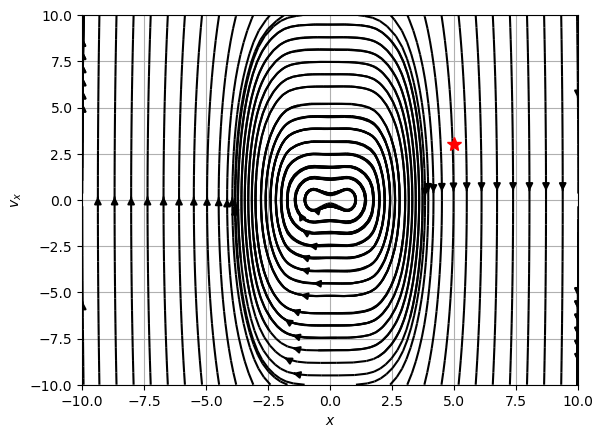

In [2]:
def SHOPhasePortrait(x, vx):
    a = -1
    b= 1
    xdot, vxdot = [vx, -a*x-b*x**3] ## Specific to this problem
    return xdot, vxdot

def ComputeSHOPhase(X, VX):    
    ## Prep the arrays with zeros at the right size
    xdot, vxdot = np.zeros(X.shape), np.zeros(VX.shape)

    ## Set the limits of the loop based on how 
    ## many points in the arrays we have
    Xlim, Ylim = X.shape
    
    ## Calculate the changes at each location and add them to the arrays
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], vxdot[i,j] = SHOPhasePortrait(xloc, yloc)
    return xdot, vxdot

## Setting parameters and the phase space variables
a = -1
b = 1
x = np.linspace(-10.0, 10.0, 20)
vx = np.linspace(-10.0, 10.0, 20)

## Get back pairs of coordinates for every point in the space
X, VX = np.meshgrid(x, vx)

## Run our calculations
xdot, vxdot = ComputeSHOPhase(X, VX)
x0 = 5
vx0 = 3
a = -1
b = 1

## Plot. plot. plot.
Q = plt.streamplot(X, VX, xdot, vxdot, color='k', broken_streamlines = False)
plt.plot(x0, vx0, 'r*', markersize=10)
plt.xlabel('$x$')
plt.ylabel('$v_x$')
plt.grid()

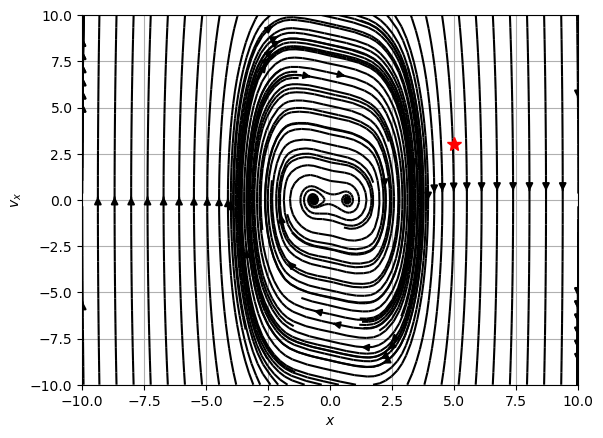

In [3]:
def SHOPhasePortrait(x, vx):
    a = -1
    b= 1
    d = 0.3
    xdot, vxdot = [vx, -d*vx - a*x-b*x**3] ## Specific to this problem
    
    return xdot, vxdot

def ComputeSHOPhase(X, VX):
    
    ## Prep the arrays with zeros at the right size
    xdot, vxdot = np.zeros(X.shape), np.zeros(VX.shape)

    ## Set the limits of the loop based on how 
    ## many points in the arrays we have
    Xlim, Ylim = X.shape
    
    ## Calculate the changes at each location and add them to the arrays
    for i in range(Xlim):
        for j in range(Ylim):
            xloc = X[i, j]
            yloc = VX[i, j]
            xdot[i,j], vxdot[i,j] = SHOPhasePortrait(xloc, yloc)
            
    return xdot, vxdot

## Setting parameters and the phase space variables

a = -1
b = 1
x = np.linspace(-10.0, 10.0, 20)
vx = np.linspace(-10.0, 10.0, 20)

## Get back pairs of coordinates for every point in the space
X, VX = np.meshgrid(x, vx)

## Run our calculations
xdot, vxdot = ComputeSHOPhase(X, VX)

x0 = 5
vx0 = 3
a = -1
b = 1

Q = plt.streamplot(X, VX, xdot, vxdot, color='k', broken_streamlines = False)
plt.plot(x0, vx0, 'r*', markersize=10)

plt.xlabel('$x$')
plt.ylabel('$v_x$')
plt.grid()

<IPython.core.display.Javascript object>


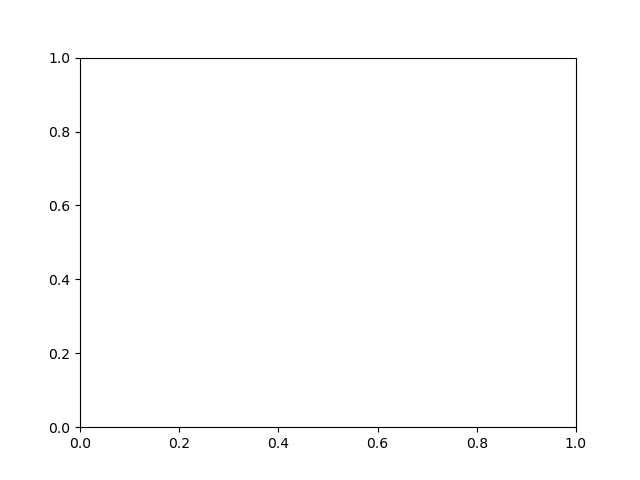

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
import time

def SHOPhasePortrait(x, vx, a=-1, b=1):
    xdot = vx
    vxdot = -a * x - b * x**3
    return xdot, vxdot

def ComputeSHOPhase(X, VX, a=-1, b=1):
    xdot = VX
    vxdot = -a * X - b * X**3
    return xdot, vxdot

# Set parameters and initial conditions
a = -1
b = 1
x0 = 5
vx0 = 3
total_time = 10  # Total time for the animation (in seconds)
fps = 30  # Frames per second
num_frames = int(total_time * fps)

# Create a figure and axis for the animation
fig, ax = plt.subplots()
ax.set_xlabel('$x$')
ax.set_ylabel('$v_x$')
ax.grid()

# Create a function to update the plot at each frame
def update(frame):
    ax.clear()
    t = frame / fps  # Current time
    time.sleep(0.1)
    x = x0 * np.cos(t)  # Varying x-coordinate for animation
    vx = vx0 * np.sin(t)  # Varying vx-coordinate for animation
    X, VX = np.meshgrid(x, vx)
    xdot, vxdot = ComputeSHOPhase(X, VX)
    Q = ax.streamplot(X, VX, xdot, vxdot, color='k', density=1)
    ax.plot(x0, vx0, 'r*', markersize=10)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$v_x$')
    ax.grid()
    return Q

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, repeat=True)

# Display the animation (may require a compatible interactive environment)
plt.show()

## Trajectories

In [9]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, omega2):
    x, v = curr_vals 
    a = -1
    b= 1
    d = 0.3
    y = 0.2
    vdot = -d*v - a*x - b*x**3 + y*np.cos(omega*t)
    return v, vdot

# 2. Time Setup
tmax = 50
dt = 0.1
tspan = (0, tmax)
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
omega2 = 2
initial_condition = [1, 0] 

# 4. Call Integrator (note we can swamp them out, RK45 is the default)
RK23solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2,), method="RK23")

plt.plot(RK23solved.y[0], RK23solved.y[1])

NameError: name 'omega' is not defined

In [ ]:
plt.plot(RK23solved.y[0], RK23solved.y[1])

## Routes to Chaos

One important route to chaotic behavior is through [period doubling](https://en.wikipedia.org/wiki/Period-doubling_bifurcation). It is not the only way for a system to become chaotic, but it is a characteristic way that a system will tend towards chaos. 

**&#9989; Do this** 

If your code is fully working, you can use known values of the parameters to investigate this behavior. For this part of the activity, you should use the full model and the following parameters:

| Parameter | Value |
|-----------|-------|
| $\alpha$  |  -1   |
| $\beta$   |  +1   |
| $\delta$  |  +0.3 |
| $\omega$  |  +1.2  |
| $\gamma$  |  +0.20 to +0.65 |

Here $\gamma$ is the only parameter that we will change. Produce phase plots of $x(t)$ and $x(\dot{x})$ for several choices of $\gamma$ with $x(0) = 1$ and $\dot{x}(0) = 0$.
